In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 
from sklearn import tree 
from matplotlib import pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
import graphviz
from sklearn.svm import SVC
from sklearn import svm
from decimal import Decimal, ROUND_HALF_UP
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,mean_squared_error
from sklearn.metrics import f1_score, plot_confusion_matrix, precision_score, recall_score, accuracy_score
%matplotlib notebook
%matplotlib inline

#### jupytere upload ettiğimiz datayı pandas ile okuyor ve yazdırıyoruz ####

In [2]:
data_hotel = pd.read_csv("hotel_bookings.csv")
data_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#### elimizdeki datanın datasetinin büyüklüğünü tanımlı etiketli ve hedef datanın tiplerini görmek için info komutunu kullanıyoruz ####

In [3]:
data_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### etiketli dataları bildiğimiz durumda rezervasyon talepleri iptal edilmiş mi edilmemiş miydi ? fakat burdaki reservation status doğrudan bizim hedef datamız ile ilişkili olduğunda traine soktuğumda tüm tahminlerim %100 oranla doğru çıktı bu yüzden bunu datasetimden çıkardım , inplace true değişikliği kalıcı olarak yap anlamına geliyor

In [4]:
data_hotel.drop(['reservation_status'],inplace=True,axis = 1)

#### çıkarma işleminin gerçekleştiğini görmek amacıyla tekrardan info komutuyla o reservation_statuse bakıyorum ve silinmiş

In [5]:
data_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### elimizdeki data'da null değer varmı varsa bunların sütun bazlı toplamını görmek için isnull().sum() kullanıyoruz ####

In [6]:
data_hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
data_hotel[['children','country','agent','company']]

,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN
2,0.0,GBR,NaN,NaN
3,0.0,GBR,304.0,NaN
4,0.0,GBR,240.0,NaN
...,...,...,...,...
119385,0.0,BEL,394.0,NaN
119386,0.0,FRA,9.0,NaN
119387,0.0,DEU,9.0,NaN
119388,0.0,GBR,89.0,NaN


#### elimdeki nul değerli etiketli dataların en fazla tekrar edenini buluyorum mode ile 

In [8]:
print(data_hotel['children'].mode())
print(data_hotel['country'].mode())
print(data_hotel['agent'].mode())
print(data_hotel['company'].mode())

0    0.0
dtype: float64
0    PRT
dtype: object
0    9.0
dtype: float64
0    40.0
dtype: float64


#### bulmuş olduğum en fazla tekrar eden değerlerini  null değerlere sahip etiketli dataların null değerlerine dolduruyorum fillna ile

In [9]:
data_hotel['children'].fillna(0,inplace =True)
data_hotel['country'].fillna('PRT',inplace =True)
data_hotel['agent'].fillna(9,inplace =True)
data_hotel['company'].fillna(40,inplace =True)

#### kontrol amacıyla tekrardan null değer varmı bakıyoruz

In [10]:
data_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

#### şimdi algoritmalar genelde sayısal değerler ile çalıştığından benim object tipteki etiketli datalarımı encod ederek sayısal hale getirmem gerekiyor bunun kısaltmak için bir liste tanımlayıp içine tüm sütun isimlerini ekliyorum

In [11]:
list_1=list(data_hotel.columns)

#### aşağıda yeni bir liste tanımlıyorum , yukarıda aldığım sütun isimlerini aşağıdaki for içinde dönderiyorum ve datanın tipi objecte eşit mi diye bakıyorum eşitse bu datanın ismini list_Cate isimli liste alıyorum ve list_cate de artık sadece object tipinde tanımlanmış sütunlar var 

In [12]:
list_cate=[]
for i in list_1:
    if data_hotel[i].dtype=='object':
        list_cate.append(i)

#### labelencoder sınıfından bir örnek oluşturuyorum bu labelencodera object tipinde tanımlanmış sütunları inte çevirmemiz için gerekli ardından for içinde yukarıdan elde ettiğim object türünde tanımlanmış sütunların teker teker tipini değiştiriyorum

In [13]:
cevir = LabelEncoder()
for i in list_cate:
    data_hotel[i]=cevir.fit_transform(data_hotel[i])

#### train işlemi olacağı sırada elimizdeki tüm veri kümesini eğitmek üzere ve test etmek üzere ayırıyoruz. Eğitim kısmında ve train kısmında aynı satır olmaması gerekiyor bu yüzden veri kümemizdeki dublice verileri çıkarmamız gerekiyor aşağıda tüm veri kümesindeki tüm dublice verilerin toplamını buluyorum

In [14]:
data_hotel.duplicated().sum()

32016

#### datasetimizden elimizdeki dublice verileri çıkarıyoruz.

In [15]:
data_hotel=data_hotel.drop_duplicates()

#### kontrol amacıyla tekrardan bakıyoruz çıkmışlar

In [16]:
data_hotel.duplicated().sum()

0

#### normalde tüm etiketli datalarda outlineları(aykırı veri) çıkarmamız gerekiyor ama zaten elimizdek veriler 0,1,2 gibi tanımlandığı outline bakmamıza gerek olan değer bu olarak belirledim aşağıdaki grafikte lead_time'ın veri dağılımı gözüküyor gözüktüğü gibi 700 ileisindeki veriler aykırı veri bunları çıkarmamız gerekiyor

<AxesSubplot:xlabel='lead_time'>

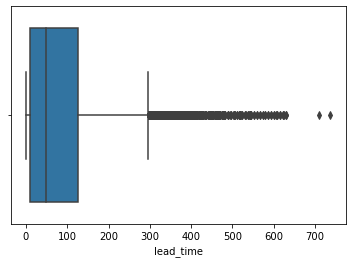

In [17]:
sns.boxplot(x=data_hotel['lead_time'])

#### aşağıdada lead_time'ı 700 geçen verilerin indeksleri bulunup datasetten çıkarılıyor

In [18]:
data_hotel= data_hotel.drop(data_hotel.index[data_hotel['lead_time'] >= 700])

#### iptal durumunun ay olarak dağılımı

<AxesSubplot:xlabel='arrival_date_month', ylabel='is_canceled'>

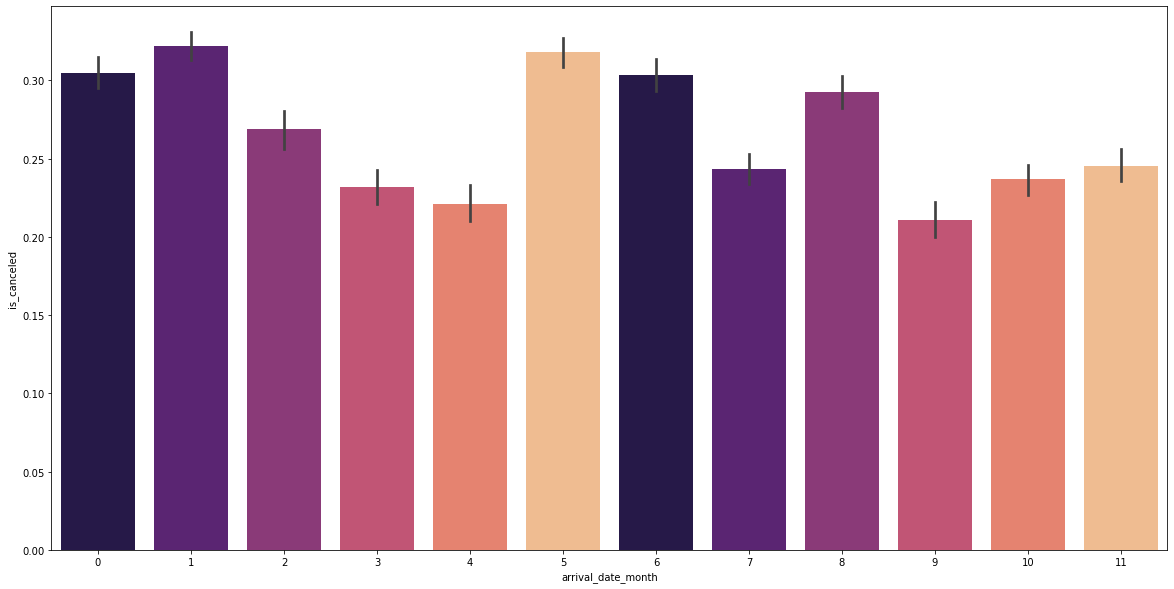

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x=data_hotel['arrival_date_month'], y=data_hotel['is_canceled'], palette=sns.color_palette("magma"))

#### iptallere etki eden arrival date mouthların grafikteki dağılımı

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


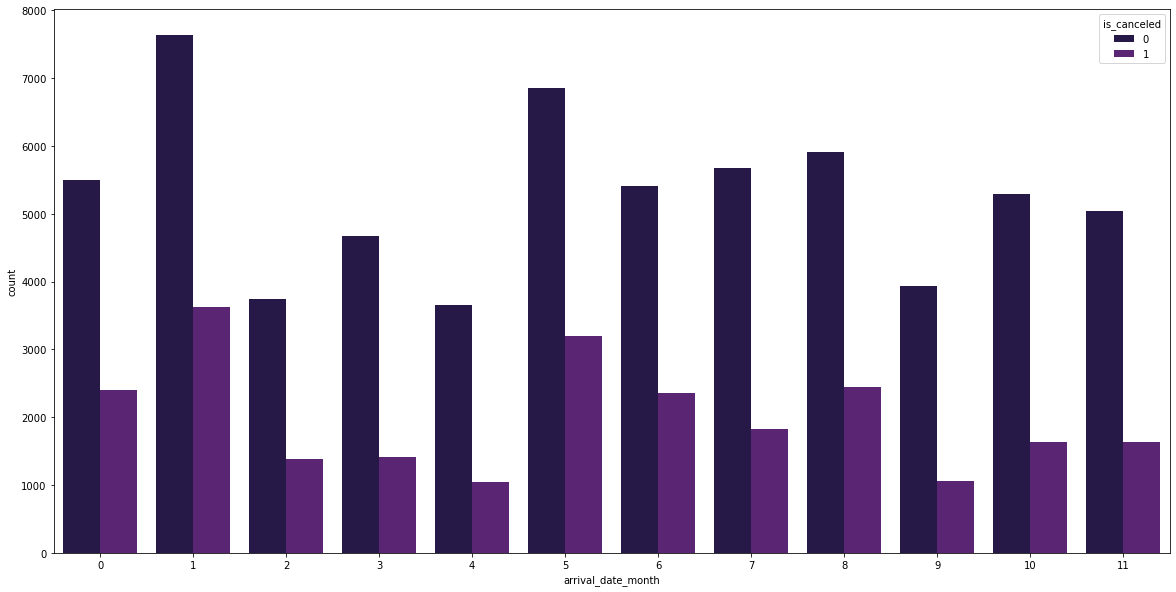

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(data_hotel.arrival_date_month,hue=data_hotel.is_canceled, palette=sns.color_palette("magma"))
plt.show()

#### Teslim süresi ve ay'ın yıl bazlı dağılımı 

<AxesSubplot:xlabel='arrival_date_month', ylabel='lead_time'>

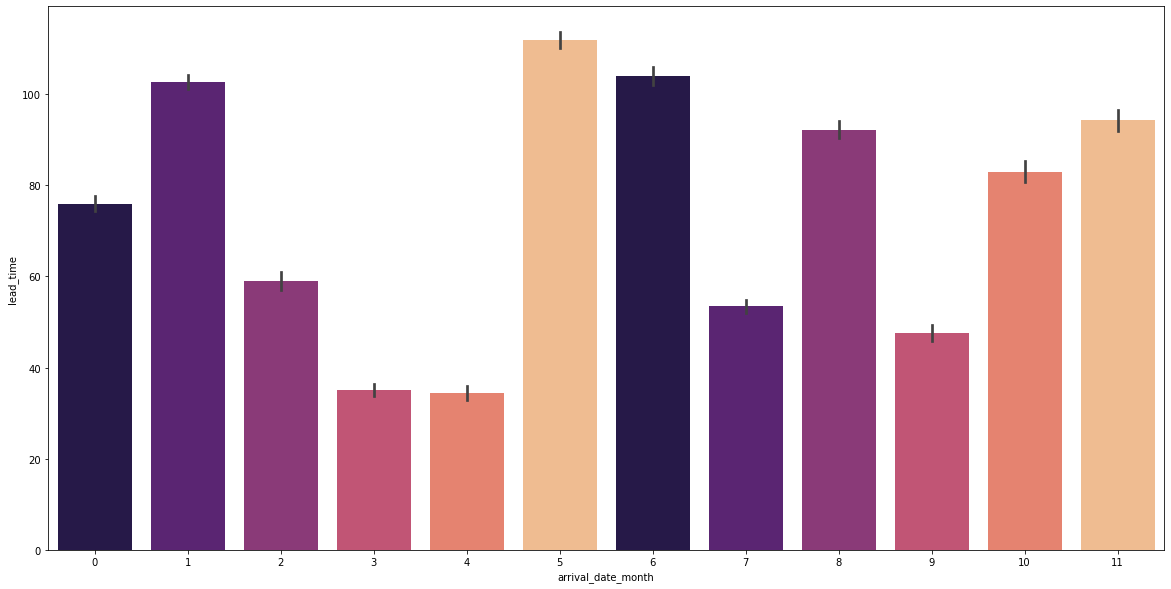

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x=data_hotel.arrival_date_month, y=data_hotel['lead_time'], palette=sns.color_palette("magma"))

 #### is_canceled ve stays_in_weekend_nights grafik üzerinde dağılımı

<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='is_canceled'>

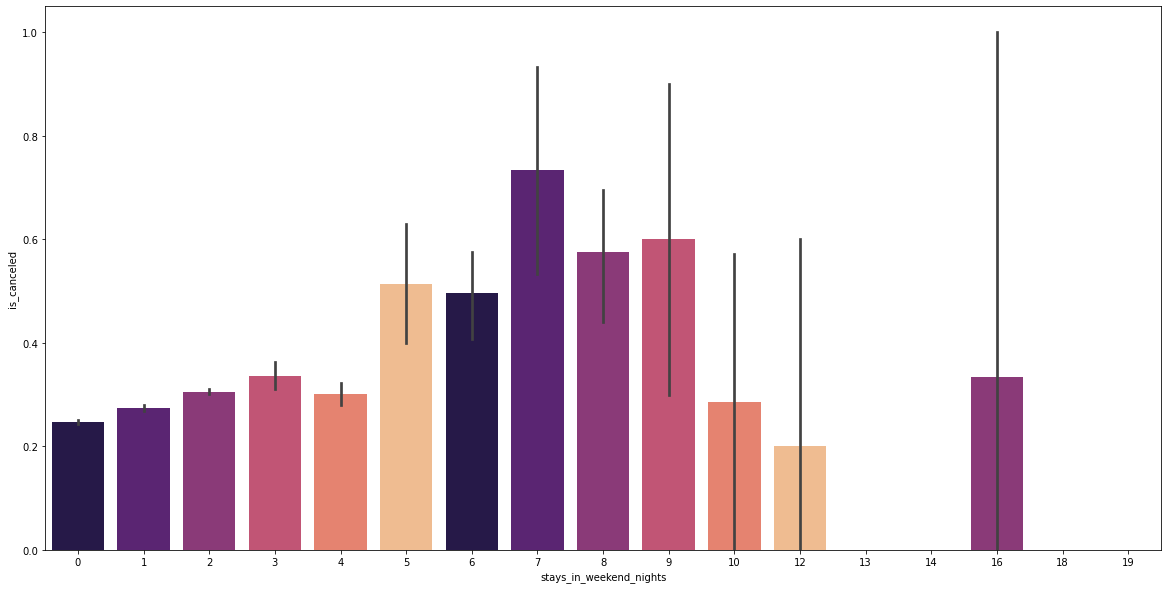

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x=data_hotel.stays_in_weekend_nights, y=data_hotel['is_canceled'], palette=sns.color_palette("magma"))

#### iptallerin ve yetişkin sayılıarının dağılımı

<AxesSubplot:xlabel='adults', ylabel='is_canceled'>

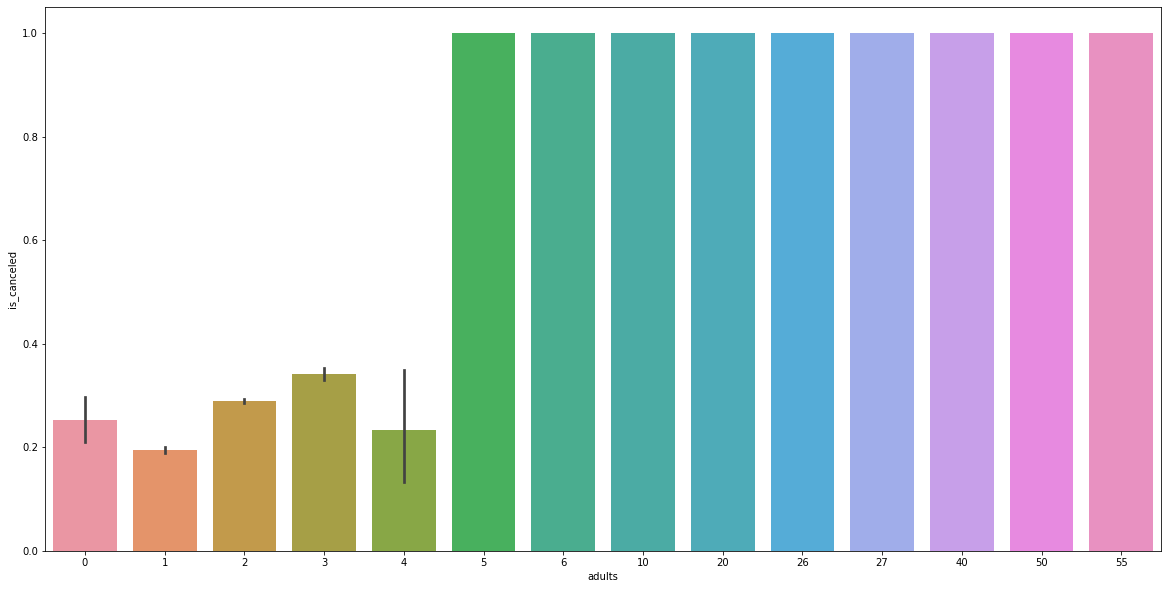

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x=data_hotel.adults, y=data_hotel['is_canceled'])

#### etiketli verimiz olan X' i tanımlamamız gerekiyor ve elimizdeki datasetteki hedef verimiz olan is_canceled bu datasetten çıkarıp X eşitliyoruz X imizde tüm sütunlarımız var is_canceled hariç 

In [24]:
X=  data_hotel.drop(['is_canceled'],axis= 1)
X

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,1,342,2015,5,27,1,0,0,2,0.0,...,3,0,9.0,40.0,0,2,0.00,0,0,121
2,1,7,2015,5,27,1,0,1,1,0.0,...,0,0,9.0,40.0,0,2,75.00,0,0,122
3,1,13,2015,5,27,1,0,1,1,0.0,...,0,0,304.0,40.0,0,2,75.00,0,0,122
4,1,14,2015,5,27,1,0,2,2,0.0,...,0,0,240.0,40.0,0,2,98.00,0,1,123
6,1,0,2015,5,27,1,0,2,2,0.0,...,0,0,9.0,40.0,0,2,107.00,0,0,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,1,35,30,2,5,2,0.0,...,0,0,394.0,40.0,0,2,96.14,0,0,919
119386,0,102,2017,1,35,31,2,5,3,0.0,...,0,0,9.0,40.0,0,2,225.43,0,2,920
119387,0,34,2017,1,35,31,2,5,2,0.0,...,0,0,9.0,40.0,0,2,157.71,0,4,920
119388,0,109,2017,1,35,31,2,5,2,0.0,...,0,0,89.0,40.0,0,2,104.40,0,0,920


#### burada hedef verimizi belirliyoruz is_canceled

In [25]:
y=data_hotel['is_canceled']
y

0         0
2         0
3         0
4         0
6         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 87372, dtype: int64

#### skorların fonksiyon içinde tanımlanması  

In [26]:
def evaluate_test(test_x, test_y, model):
    preds = model.predict(test_x)
    print("F1 score: {}, Recall Score: {}, Precision Score:{}, Accuracy: {} ".format(f1_score(test_y, preds), recall_score(test_y, preds), precision_score(test_y, preds),
                                                                                     accuracy_score(test_y, preds)))

#### baştada bahsettiğim gibi elimizdeki verileri train için ve test için olarak bölmemiz gerekiyor train_test_split ile tüm datasetini bölme işlemini gerçekleştiriyoruz 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

#### Decisiontreeclassifier sınıfından bir örnek oluşturuyoruz oluştururkende görselleştireceğimiz zamanki node sayısını X deki kolon sayısı olarak belirliyoruz criterion gini yada entropy olabilir bunlar ayırma biçimi homojen ayırılıp ayrılmadıkları konusunda verilen değerler ardından .fit fonksiyonu ile öğrenme işlemini gerçekleştiriyoruz ve modelimiz oluşmuş oluyor

In [28]:
classifierr = tree.DecisionTreeClassifier(max_leaf_nodes=30,criterion='entropy',random_state=0,ccp_alpha=0.020)
classifierr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_leaf_nodes=30,
                       random_state=0)

#### yukarıda oluşturduğumuz modeli görselleştirmek için aşağıdaki graphviz kütüphanesini kullanarak görselleştiriyoruz baştaki classifierr zaten modelimiz out file dışarıya kayıt için felan bir şey dönecekmi feature name etiketli datalarımızın isimleri class ise hedef datamız 

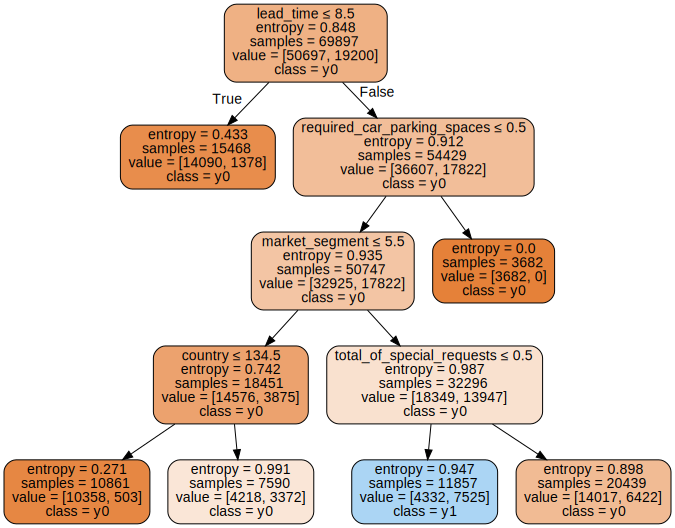

In [29]:
dot_data = tree.export_graphviz(classifierr, out_file=None, 
                              feature_names=X.columns,  
                              class_names=True,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

#### elimiz test için bulunan verileri modelimize sokup bir accuracy skorunu hesaplıyoruz 0.lı geldiğinden 100 ile çarpıyoruz 

In [30]:
tahmin=classifierr.score(X_test,y_test)*100
y_train_pred = classifierr.predict(X_train)
y_test_pred = classifierr.predict(X_test)
classes = ['True','False']

#### convusion matrix'in fonksiyonu 

In [31]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

#### accuracy skorları ve confision matrixsin bastırılması 

Train score 0.770991601928552
Test score 0.7693276108726752
Train Confusion matrix


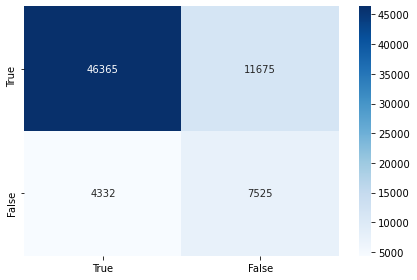

Test Confusion matrix


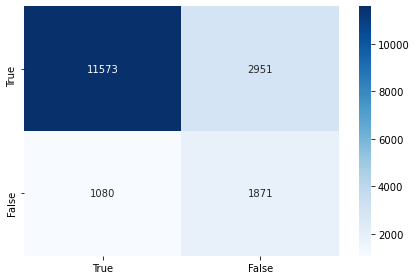

In [32]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [33]:
evaluate_test(X_test,y_test,classifierr)

F1 score: 0.48141000900553194, Recall Score: 0.3880132725010369, Precision Score:0.6340223652998983, Accuracy: 0.7693276108726752 


#### sonuclar adında list oluşturuyorum yukarıda tahmin ettiim değerin virgülden sonra 4 hanesini alarak scortree ye atıyorum onuda liste ekliyorum


In [34]:
sonuclar = []
scortree = round(tahmin,4)
sonuclar.append(scortree)
sonuclar[0]

76.9328

In [35]:
sonuclar2 = []
accuracymean=cross_val_score(estimator=classifierr,X=X_train,y=y_train,cv=10)
scor1 = round(accuracymean.mean()*100,4)
sonuclar2.append(scor1)
sonuclar2

[77.0877]

#### randomforest sınıfından rfc adında bir örnek oluşturuyorum ve .fit ile öğrenme işlemini gerçekleştiriyorum

In [36]:

rfc=RandomForestClassifier(criterion='entropy',)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

#### oluşturduğum modele x_test verilerini verip bir tahmin oluşturuyorum bu tahmini gerçek değerler ile accuracy score a yollayıp scorumu hesaplıyorum oluşan scorun virgüden sonra 4 tanesini alıyorum ve sonuclar listesine ekliyorum

In [37]:
tahmin2=rfc.predict(X_test)
error2=tahmin2
scor_2=accuracy_score(y_test,tahmin2)
scorrandom = round(scor_2*100,4)
sonuclar.append(scorrandom)
error_2=mean_squared_error(y_test,error2)
error_2

0.07685264663805437

In [38]:
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)
classes = ['True','False']

#### ağaçlar için testlerin bastırılmaso

In [39]:
evaluate_test(X_test,y_test,rfc)

F1 score: 0.8488463702870006, Recall Score: 0.7820406470344256, Precision Score:0.9281319222249569, Accuracy: 0.9231473533619456 


#### accuracy ile confusionmatrixlerin bastırılması

Train score 0.9999856932343305
Test score 0.9231473533619456
Train Confusion matrix


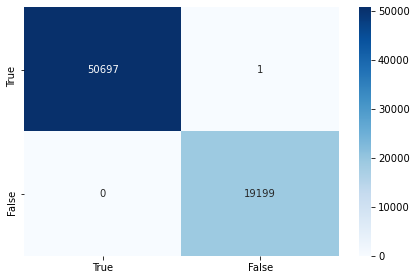

Test Confusion matrix


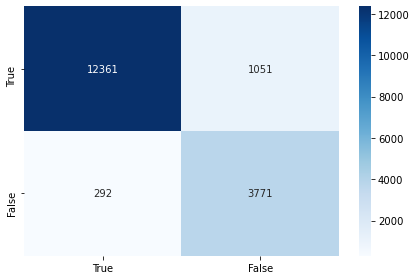

In [40]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [42]:
accuracymean=cross_val_score(estimator=rfc,X=X_train,y=y_train,cv=10)
scor2 = round(accuracymean.mean()*100,4)
sonuclar2.append(scor2)

#### matlpotlib sitesinde example bölümünde bir sürü böyle hazır grafik setleri var bende oradan aldım labels kullandığın algoritmalar sonuclar ' da rects1 in içine yazılıyo aşağıdaki tabloyu veriyor bu kadar

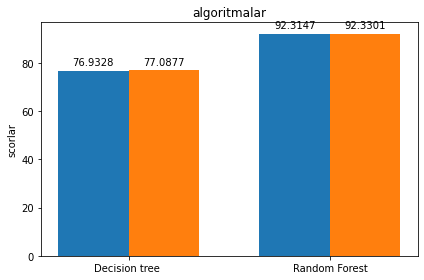

In [43]:
labels = ['Decision tree ', 'Random Forest']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sonuclar, width)
rects2 = ax.bar(x + width/2, sonuclar2, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('scorlar')
ax.set_title('algoritmalar')
ax.set_xticks(x)
ax.set_xticklabels(labels)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()